# ***This notebook showcases the steps to Model Reproducibilty using the soltrannet model and Ersilia eos6oli model as part of the task for outreachy 2024 contribution.***

# Checking Model Reproducibility Using Author's Implementation

In [ ]:
#Making the necessary installations
!pip install rdkit
!pip install soltrannet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
#importing the necessary packages and libraries
import soltrannet as stn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import sys

In [ ]:
#_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [ ]:
## Mount google drive
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# my input folder
input_folder = "/content/drive/MyDrive/Ersilia"

In [ ]:
# my output folder
output_folder = "/content/drive/MyDrive/Ersilia"

In [ ]:
# my csv
input_filename = "llinas2020_raw"

In [ ]:
# my smiles column
smiles_column = "smiles"

In [ ]:
# checking smiles
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [ ]:
#checking my data
df

,COMPOUND,SET,log S0,smiles
0,Acetazolamide,SET1,-2.38,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O
1,Acetylsalicylic Acid,SET1,-1.67,C(C)(=O)OC1=CC=CC=C1C(=O)O
2,Alclofenac,SET1,-4.40,C=CCOc1ccc(cc1Cl)CC(=O)O
3,Ambroxol,SET1,-3.87,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2
4,Aripiprazole,SET1,-6.64,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...
...,...,...,...,...
127,Sulfadimethoxine,SET2,-3.74,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC
128,Tamoxifen,SET2,-7.52,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...
129,Telmisartan,SET2,-6.73,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...
130,Terfenadine,SET2,-7.74,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...


In [ ]:
# Extract smiles from the DataFrame and make predictions
my_smiles = df["smiles"].tolist()
predictions = list(stn.predict(my_smiles))
predictions

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


[(-1.2419066429138184, 'CC(NC1=NN=C(S1)[S](N)(=O)=O)=O', ''),
 (-1.857985258102417, 'C(C)(=O)OC1=CC=CC=C1C(=O)O', ''),
 (-3.119774103164673, 'C=CCOc1ccc(cc1Cl)CC(=O)O', ''),
 (-2.1994705200195312, 'O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2', ''),
 (-5.205143928527832,
  'O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c2)CC1',
  ''),
 (-6.521167755126953, 'O=C1c2ccccc2C(=O)C(O)=C1C1CCC(CC1)c1ccc([Cl])cc1', ''),
 (-2.817272663116455, 'CCNc1nc(nc(n1)Cl)NC(C)C', ''),
 (-1.7760666608810425, 'C1=CC(=CC=C1C(CC(O)=O)CN)Cl', ''),
 (-1.8396010398864746, 'CCC(C)C1(C(=O)NC(=O)NC1=O)CC', ''),
 (-4.210572719573975,
  'C1=C(Cl)C(=CC2=C1NC(=N[S]2(=O)=O)CSCC3=CC=CC=C3)[S](N)(=O)=O',
  ''),
 (-4.71967077255249, 'O=C1Nc2c(C(c3ncccc3)=NC1)cc(Br)cc2', ''),
 (-7.789660453796387,
  'CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6',
  ''),
 (-3.8526968955993652, 'C1=CC=CC3=C1N(C2=C(C=CC=C2)C=C3)C(N)=O', ''),
 (-3.251559257507324, 'C1=CC=CC2=C1[NH]C3=CC=CC=C23', ''),
 (-2.4678301

In [ ]:
#putting my predictions into a dataframe and saving it as a csv
predictions_df = pd.DataFrame(predictions, columns=["pred", "smiles", "Empty_Strings"])

predictions_df.to_csv("/content/drive/MyDrive/Ersilia/Soltranet_Predictions.csv", index=False)
predictions_df

,pred,smiles,Empty_Strings
0,-1.241907,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,
1,-1.857985,C(C)(=O)OC1=CC=CC=C1C(=O)O,
2,-3.119774,C=CCOc1ccc(cc1Cl)CC(=O)O,
3,-2.199471,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,
4,-5.205144,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,
...,...,...,...
127,-3.680895,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC,
128,-5.474015,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...,
129,-7.919227,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...,
130,-4.835241,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...,


In [ ]:
# Merging dataframes using the smiles column
#merging the df with the author predictions with my predictions
merged_predictions = pd.merge(predictions_df, df[['smiles', 'log S0']], how='left', left_on='smiles', right_on='smiles')

# Renaming and dropping redundant columns

merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})
merged_predictions = merged_predictions.drop(columns='Empty_Strings', axis=1)

# Displaying the result
print(merged_predictions)

         pred                                             smiles  true
0   -1.241907                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O -2.38
1   -1.857985                         C(C)(=O)OC1=CC=CC=C1C(=O)O -1.67
2   -3.119774                           C=CCOc1ccc(cc1Cl)CC(=O)O -4.40
3   -2.199471           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2 -3.87
4   -5.205144  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c... -6.64
..        ...                                                ...   ...
127 -3.680895      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC -3.74
128 -5.474015  C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)... -7.52
129 -7.919227  CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5... -6.73
130 -4.835241  C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)... -7.74
131 -3.475417                  C3=CC1=C([NH]C(=N1)C2=CSC=N2)C=C3 -3.97

[132 rows x 3 columns]


In [ ]:
#converting to csv and saving to drive
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_prediction.csv", index=False)

# **Recreating figures from the author publication**


In [ ]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)



In [ ]:
#where true = the author's prediction and pred = my prediction using the author dataset
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_prediction.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['pred']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [ ]:
np.mean(truths)

-4.321439393939395

19


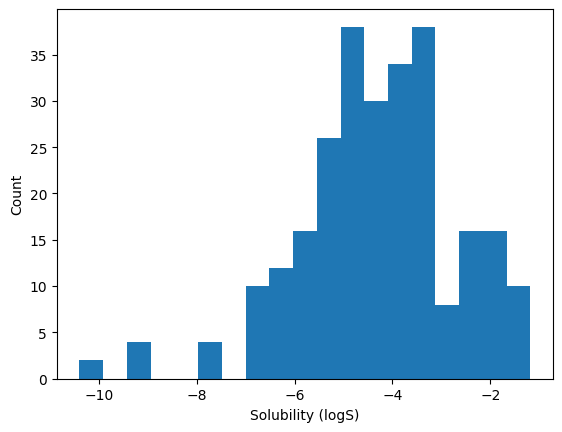

In [ ]:
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Plot_Reproducibility.png')

In [ ]:
import glob

In [ ]:
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/llinas2020_submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/llinas2020_submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [ ]:

data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('pmsa_c', 0.7758620689655172),
   ('flwmu', 0.9482758620689655),
   ('pmsa_a', 0.7586206896551724),
   ('jmsa_b', 0.8793103448275862),
   ('jmsa_a', 0.9655172413793104),
   ('hpsu_a', 0.5517241379310345),
   ('asll_b', 0.9137931034482759),
   ('mlkc_c', 0.8793103448275862),
   ('mcsmd', 0.896551724137931),
   ('jcsu_a', 0.8793103448275862),
   ('pmsa_b', 0.7413793103448276),
   ('mlkc_a', 0.8620689655172413),
   ('jhtny', 0.896551724137931),
   ('jmsa_c', 0.9655172413793104),
   ('mlkc_b', 0.896551724137931),
   ('asll_a', 1.0),
   ('hpsu_b', 0.5517241379310345),
   ('jhunc_a', 0.9482758620689655),
   ('asll_c', 0.9827586206896551),
   ('jhunc_c', 0.9827586206896551),
   ('nmupi', 0.8275862068965517),
   ('jhunc_b', 1.0),
   ('astu', 0.7413793103448276),
   ('jcsu_b', 0.9482758620689655),
   ('ksmit', 0.8620689655172413)],
  'fail': [('SolTranNet', 0.2894736842105263),
   ('pmsa_c', 0.16666666666666666),
   ('flwmu', 0.3956043956043

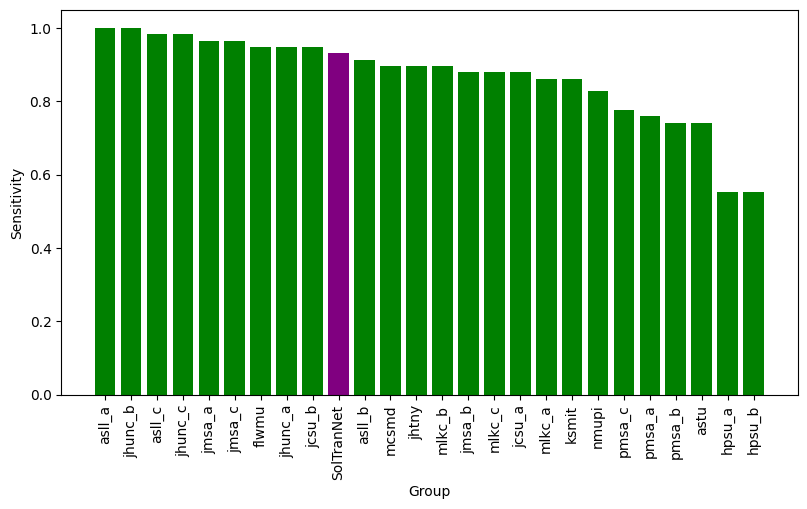

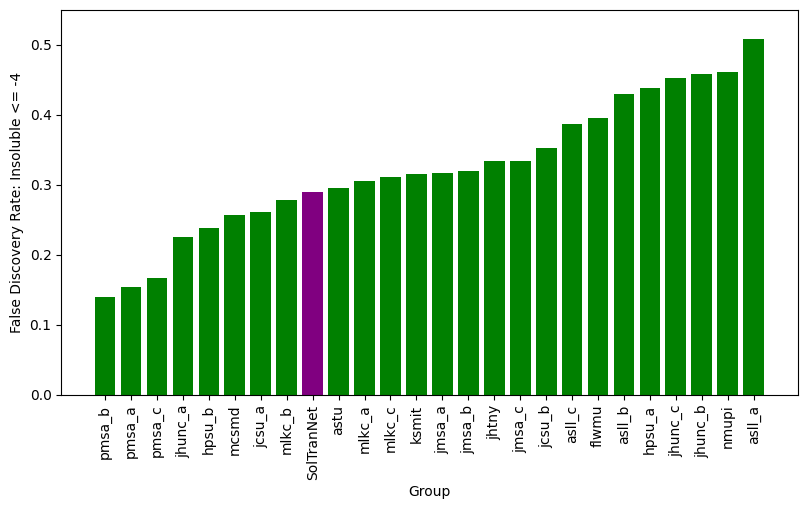

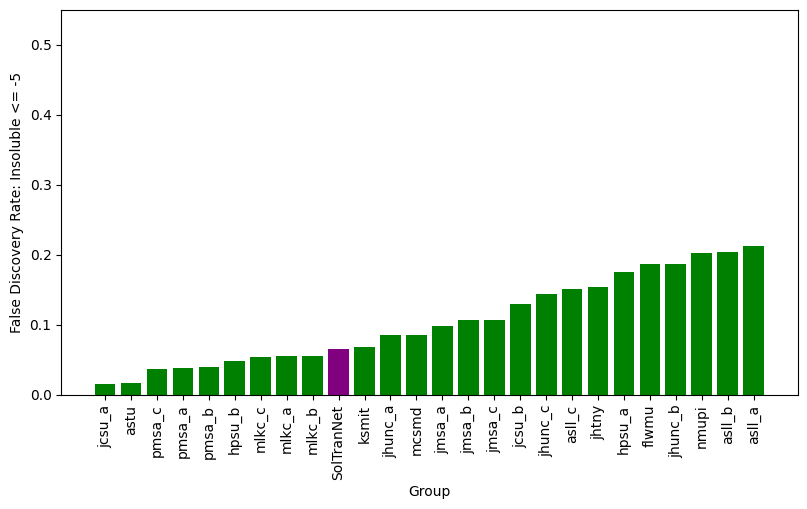

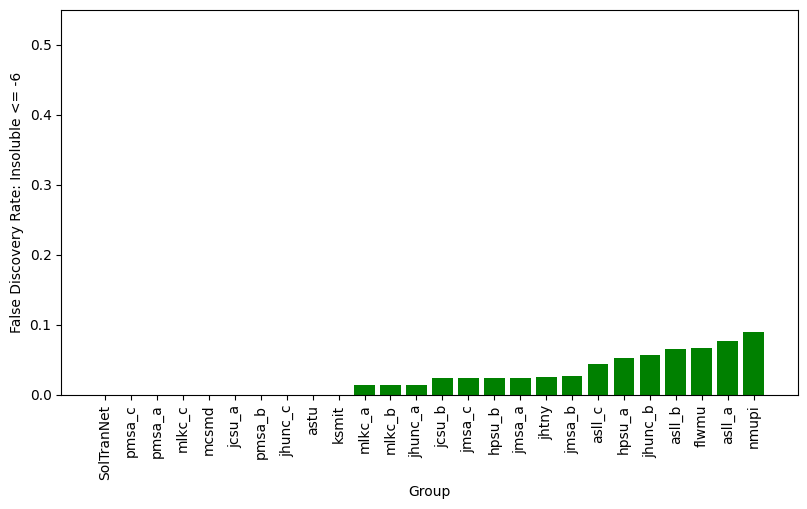

In [ ]:
#recreating the author bar graphs
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        fig = f'/content/drive/MyDrive/Ersilia/SensitivityPlot_{ins}.png'
        plt.savefig(fig)
        plotted_sens=True

##### **False Discovery Rate where insoluble is LogS <= -4. Soltrannet is shown in purple.**
#### **False Discovery Rate where insoluble is LogS <= 5. Soltrannet is shwon in purple.**
#### **False Discovery Rate where insoluble is LogS <= -6. Soltrannet is not seen.**

## The Analysis of the performance of Soltrannet model in classifying compounds as soluble or insoluble.

#### "Solubility of compounds is considered significant if their logarithm of solubility exceeds -4. Analysis of the charts reveals false discovery rates at thresholds of -5 and -6, indicating instances where the model incorrectly predicted compounds as soluble when they were actually insoluble. Interestingly, lowering the threshold for soluble compounds to -5 or -6 resulted in a decrease in the false discovery rate. This suggests that Soltrannet is more adept at identifying insoluble compounds, particularly when the classification threshold is less stringent."

# **Checking Model Reproducibility using eos6oli (Ersilia Model) And The Same Dataset gotten from the author**

In [ ]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [ ]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-21 18:39:49--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   205MB/s    in 0.5s    

2024-03-21 18:39:49 (205 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [ ]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-l9n15ews
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-l9n15ews
  Resolved https://github.com/ersilia-os/ersilia.git to commit ede7206c99bdc7315c71874e2704bb76a3110aaa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 670 kB 4.4 MB/s 
     |████████████████████████████████| 9.9 MB 43.9 MB/s 
     |████████████████████████████████| 4.3 MB 46.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 58 kB 6.7 MB/s 
     |████████████████████████████████| 421 kB 70.6 MB/s 
     |████████████████████████████████| 139 kB 65.4 MB/s 
     |████████████████████████████████| 97 kB 8.4 MB/s 
     |████████████████████████████████| 148 kB 57.3 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
     |█████████

# Downloading and running the selected model from Ersilia

In [ ]:
model_name = "eos6oli"

Fetching the model

In [ ]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-y9f9hrwr
Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |       h06a4308_0 

Serving the model

In [ ]:
# Serving the model

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:46793
   PID: 13357
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


Running Predictions for soltranet data found in the github repo using Ersilia

In [ ]:
#Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 14.81 seconds


In [ ]:
# Check the results

print(output.head())

                           key  \
0  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2  ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3  JBDGDEWWOUBZPM-XYPYZODXSA-N   
4  CEUORZQYGODEFX-UHFFFAOYSA-N   

                                               input  solubility  
0                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242  
1                         C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858  
2                           C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120  
3           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199  
4  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205  


In [ ]:
#Save the results in Google Drive
output = pd.DataFrame(output, columns=['key', 'input', 'solubility'])

#output.to_csv("/content/drive/MyDrive/Ersilia/Ersilia_Prediction.csv", index=False)

output

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205
...,...,...,...
127,ZZORFUFYDOWNEF-UHFFFAOYSA-N,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC,-3.681
128,NKANXQFJJICGDU-QPLCGJKRSA-N,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...,-5.474
129,RMMXLENWKUUMAY-UHFFFAOYSA-N,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...,-7.919
130,GUGOEEXESWIERI-UHFFFAOYSA-N,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...,-4.835


In [ ]:
#Save the results in Google Drive


output.to_csv("/content/drive/MyDrive/Ersilia/Ersilia_Prediction.csv", index=False)

In [ ]:
#reading in prediction results
Ersilia_Prediction=pd.read_csv("/content/drive/MyDrive/Ersilia/Ersilia_Prediction.csv")
Ersilia_Prediction.head()

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205


In [ ]:
#combining outputs with SMILES and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(Ersilia_Prediction, df[['smiles', 'log S0']], how='left', left_on='input', right_on='smiles')

# Renaming columns

merged_predictions = merged_predictions.rename(columns={'log S0': 'true', 'solubility': 'solubility_pred'})


# Displaying the result
#print(merged_predictions)
merged_predictions.head()

,key,input,solubility_pred,smiles,true
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-2.38
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.67
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120,C=CCOc1ccc(cc1Cl)CC(=O)O,-4.40
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-3.87
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-6.64


In [ ]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_Ersilia_prediction.csv", index=False)

# Recreating results generated with SC2 datasets by the author but with the prediction gotten from the Ersilia model


In [ ]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)

In [ ]:
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv(f"/content/drive/MyDrive/Ersilia/merged_Ersilia_prediction.csv")
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['solubility_pred']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [ ]:
np.mean(truths)

-4.321439393939395

19


Text(0, 0.5, 'Count')

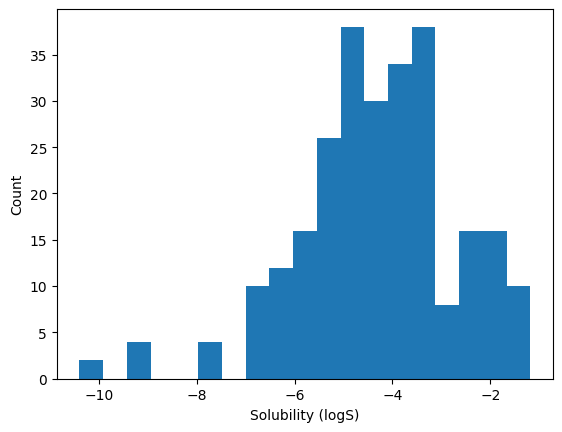

In [ ]:
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
# figure_path = '/content/Ersilia-Model-Evaluation/figures/histogram_Erislia_.png'
# plt.savefig(figure_path)

In [ ]:
import glob
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/llinas2020_submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/llinas2020_submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [ ]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('pmsa_c', 0.7758620689655172),
   ('flwmu', 0.9482758620689655),
   ('pmsa_a', 0.7586206896551724),
   ('jmsa_b', 0.8793103448275862),
   ('jmsa_a', 0.9655172413793104),
   ('hpsu_a', 0.5517241379310345),
   ('asll_b', 0.9137931034482759),
   ('mlkc_c', 0.8793103448275862),
   ('mcsmd', 0.896551724137931),
   ('jcsu_a', 0.8793103448275862),
   ('pmsa_b', 0.7413793103448276),
   ('mlkc_a', 0.8620689655172413),
   ('jhtny', 0.896551724137931),
   ('jmsa_c', 0.9655172413793104),
   ('mlkc_b', 0.896551724137931),
   ('asll_a', 1.0),
   ('hpsu_b', 0.5517241379310345),
   ('jhunc_a', 0.9482758620689655),
   ('asll_c', 0.9827586206896551),
   ('jhunc_c', 0.9827586206896551),
   ('nmupi', 0.8275862068965517),
   ('jhunc_b', 1.0),
   ('astu', 0.7413793103448276),
   ('jcsu_b', 0.9482758620689655),
   ('ksmit', 0.8620689655172413)],
  'fail': [('SolTranNet', 0.2894736842105263),
   ('pmsa_c', 0.16666666666666666),
   ('flwmu', 0.3956043956043

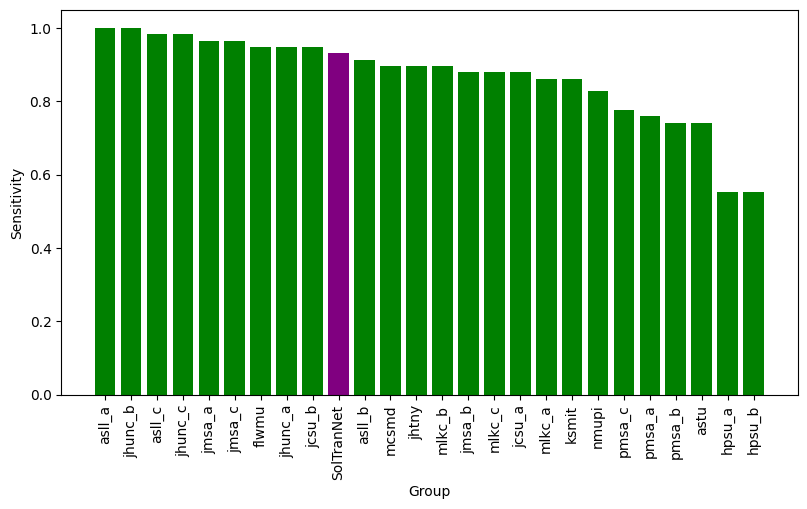

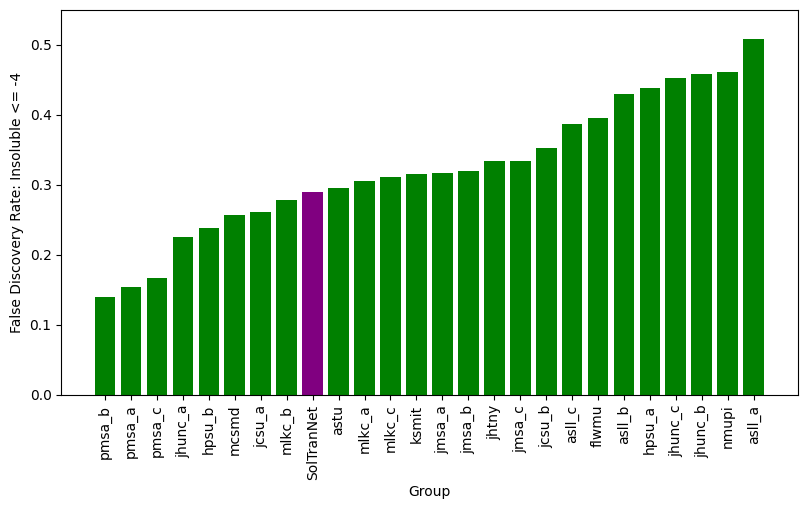

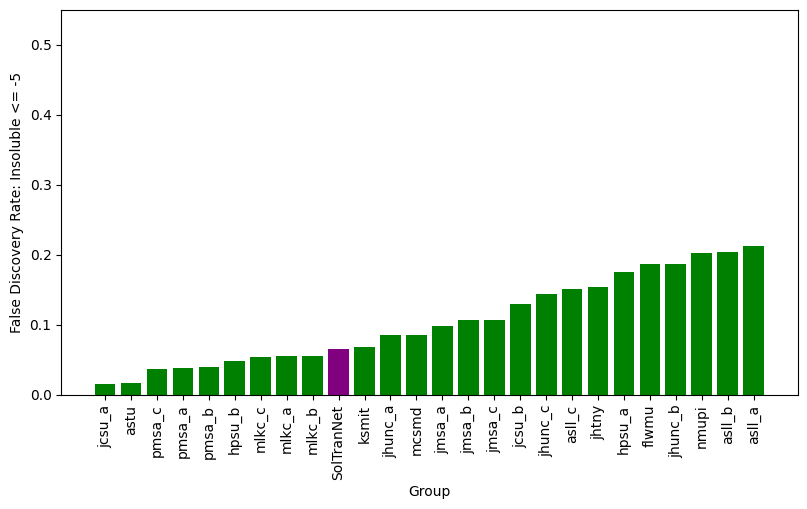

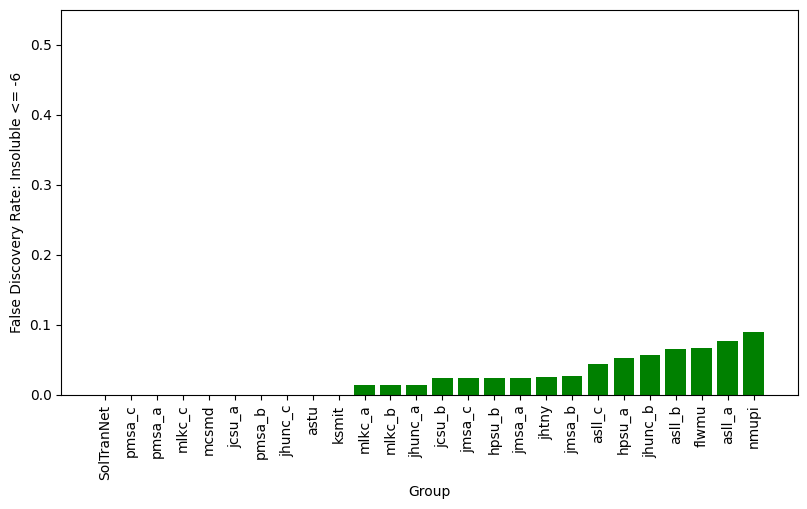

In [ ]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        fig = f'/content/drive/MyDrive/Ersilia/SensitivityPlot_{ins}Ersilia.png'
        plt.savefig(fig)
        plotted_sens=True

# Results

## **As can be observed from above both model produce the exact same chart using the same test Datasets.**

## **This consistency indicates the reproducibility of our eos6oli model**